## Web Scraping & Brand Mentions Analysis: Filipino Makeup Brands in ABS-CBN Article
This project uses web scraping with BeautifulSoup to extract text from an ABS-CBN article about Filipino makeup brands. It counts how many times each brand is mentioned and visualizes the results in a horizontal bar chart. The analysis highlights which brands are most frequently featured in the article.

In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load local HTML file of the ABS-CBN article
with open("C:\\Users\\ACER\\Downloads\\Data Analytics\\Python\\Project\\Dataset\\influencers-pick-ph-makeup-brands.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")
# Display the title of the webpage
print(soup.title.text)

Influencers’ picks from Filipino makeup brands for your kikay loved ones this V-day | ABS-CBN Lifestyle


__Inspecting HTML Structure__

In [9]:
# Print out the first few <div> elements and their class name to understand HTML structure
for div in soup.find_all('div', limit=20):
    print(div.get('class'))

None
None
['MuiGrid-root', 'MuiGrid-container', 'css-1u3t278']
['MuiGrid-root', 'MuiGrid-item', 'MuiGrid-grid-xs-12', 'MuiGrid-grid-md-12', 'css-15j76c0']
None
['MuiGrid-root', 'MuiGrid-container', 'MuiGrid-spacing-xs-2', 'css-isbt42']
['MuiGrid-root', 'MuiGrid-item', 'MuiGrid-grid-xs-12', 'MuiGrid-grid-md-12', 'css-15j76c0']
['imp-adSlot-common', 'imp-adSlot-0']
['MuiGrid-root', 'MuiGrid-item', 'MuiGrid-grid-xs-12', 'MuiGrid-grid-md-12', 'css-15j76c0']
None
['MuiGrid-root', 'MuiGrid-container', 'MuiGrid-spacing-xs-2', 'css-isbt42']
['MuiGrid-root', 'MuiGrid-item', 'MuiGrid-grid-xs-12', 'MuiGrid-grid-md-12', 'css-15j76c0']
['MuiBox-root', 'css-11f6pqh']
None
['MuiBox-root', 'css-inxrad']
['MuiGrid-root', 'css-v4fugb']
['MuiGrid-root', 'MuiGrid-container', 'css-1un1tya']
['MuiBox-root', 'css-yj0oh0']
['MuiBox-root', 'css-gmuwbf']
['MuiBox-root', 'css-yb8nba']


In [11]:
# Attempt to locate main content container
main_content = soup.find('div', class_='text-wrapper')

if main_content:
    article_text = main_content.get_text(separator=' ', strip=True)
    print(article_text[:500])  # Preview first 500 characters
else:
    print("Main content container not found. Extracting full text instead.")

Main content container not found. Extracting full text instead.


In [15]:
#Extracting all the text
article_text = soup.get_text(separator=' ', strip=True)
print(article_text[:1000])

Influencers’ picks from Filipino makeup brands for your kikay loved ones this V-day | ABS-CBN Lifestyle Influencers’ picks from Filipino makeup brands for your kikay loved ones this V-day Entertainment News Metro.Style Lifestyle Sports More Traffic 31 ° C Manila Horoscope Featured : Marcos won't release unverified list of individuals behind flood control mess: Palace Word of the Day for August 6, 2025: abunas FIBA: Rude welcome for Gilas vs. Chinese Taipei in Asia Cup opener House revives Quad Comm with adoption of House Resolution 106 What to expect at Aug 6 Senate impeachment debates 'Extortion': Metro Manila areas face complaints over excessive parking charges Marcos strikes defense deals in India LOTTO RESULTS: Agosto 5, 2025 Misamis Occidental church temporarily closes after vlogger spits on holy water font • • • • • • • • • ADVERTISEMENT Featured : Marcos won't release unverified list of individuals behind flood control mess: Palace Word of the Day for August 6, 2025: abunas FIBA

__Brand List for Analysis__: 
Define a list of popular **Filipino makeup brands** to search for within the article text.

In [22]:
# List of Filipino beauty brands
brands = [
    "Colourette", "GRWM", "Vice", "Ever Bilena", "Issy", "Happy Skin",
    "BLK", "Careline", "Detail Cosmetics", "Sunnies Face", "Fresh Formula"
]

__Counting Brand Mentions__

In [24]:
# Count occurrences of each brand
brand_counts = {
    brand: article_text.lower().count(brand.lower()) for brand in brands
}

# Convert to DataFrame for easier viewing
df_brands = pd.DataFrame(list(brand_counts.items()), columns=["Brand", "Mentions"])

# Sort from most to least mentions
df_brands = df_brands.sort_values(by="Mentions", ascending=False)

df_brands

,Brand,Mentions
2,Vice,5
1,GRWM,3
4,Issy,2
0,Colourette,1
5,Happy Skin,1
8,Detail Cosmetics,1
3,Ever Bilena,0
6,BLK,0
7,Careline,0
9,Sunnies Face,0


__Visualization of Brand Mentions__

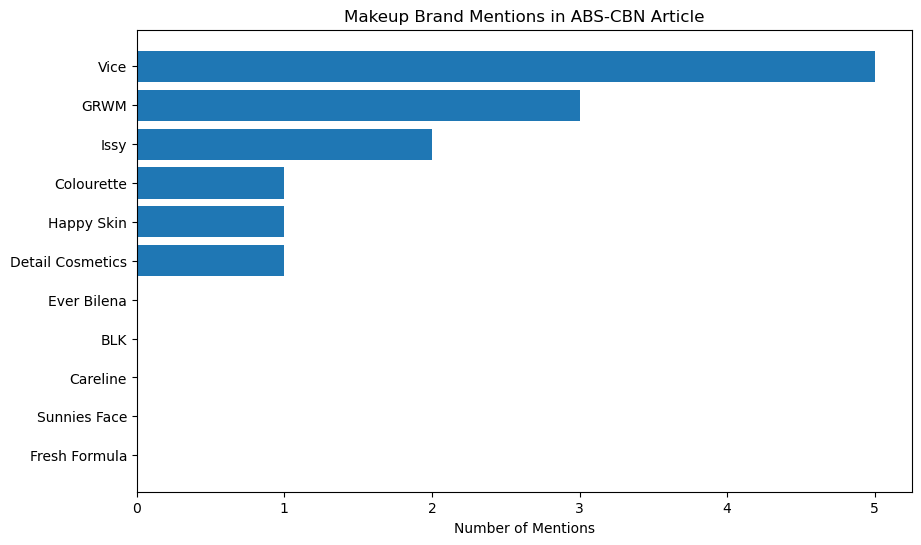

In [77]:
#Visualizing the data
plt.figure(figsize=(10, 6))
plt.barh(df_brands["Brand"], df_brands["Mentions"])
plt.xlabel("Number of Mentions")
plt.title("Makeup Brand Mentions in ABS-CBN Article")
plt.gca().invert_yaxis()
plt.show()

## Project Summary
This analysis reveals that the **Filipino makeup brand** that received the most exposure in the article is Vice Cosmetics. 
This brand with more mentions may have stronger visibility or relevance in the current beauty trends discussed by influencers in the article.